### Import Library

Need to run once and reset runtime before process any further

In [62]:
ag_install = True #@param {type:'boolean'}

if ag_install:
  !pip install --upgrade mxnet
  !pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# Data Preprocessing

## Import Data form CSV

In [64]:
df = pd.read_csv('thai-it-salary-form-response-2022.csv')

df = df[['WorkPlace', 'EdLevel', 'YearsCodePro', 'YearsCode', 'Employment',
         'WorkPosition', 'DevType', 'OrgSize', 'Salary']]

In [65]:
print(df.shape)
df

(416, 9)


,WorkPlace,EdLevel,YearsCodePro,YearsCode,Employment,WorkPosition,DevType,OrgSize,Salary
0,กรุงเทพมหานคร (Bangkok),ปริญญาเอก (Doctoral Degree or PhD),4.0,15.0,full-time,Data,"Data scientist or machine learning specialist, Scientist","10,000 คนขึ้นไป (10,000 or more employees)",1500000
1,กรุงเทพมหานคร (Bangkok),ปริญญาเอก (Doctoral Degree or PhD),0.0,7.0,full-time,Data,"Data scientist or machine learning specialist, Academic researcher, Student",2 คนขึ้นไป แต่ไม่เกิน 20 คน (2 to 19 employees),240000
2,กรุงเทพมหานคร (Bangkok),ปริญญาโท (Master's Degree),6.0,2.0,full-time,Data,Data engineer,"1,000 คนขึ้นไป แต่ไม่เกิน 10,000 คน (1,000 to 9,999 employees)",756000
3,กรุงเทพมหานคร (Bangkok),ปริญญาตรี (Bachelor's Degree),5.0,5.0,full-time,Web dev,"Front-end developer, QA or test developer, Designer",20 คนขึ้นไป แต่ไม่เกิน 100 คน (20 to 99 employees),400000
4,กรุงเทพมหานคร (Bangkok),ปริญญาตรี (Bachelor's Degree),2.0,4.0,full-time,Web dev,Full-stack developer,2 คนขึ้นไป แต่ไม่เกิน 20 คน (2 to 19 employees),264000
...,...,...,...,...,...,...,...,...,...
411,กรุงเทพมหานคร (Bangkok),ปริญญาตรี (Bachelor's Degree),4.0,8.0,full-time,Web dev,Full-stack developer,20 คนขึ้นไป แต่ไม่เกิน 100 คน (20 to 99 employees),45000
412,กรุงเทพมหานคร (Bangkok),ปริญญาตรี (Bachelor's Degree),2.0,2.0,full-time,Engineer,Software Engineer,"100 คนขึ้นไป แต่ไม่เกิน 1,000 คน (100 to 999 employees)",32000
413,สมุุทรสงคราม (Samut Songkhram),ปริญญาตรี (Bachelor's Degree),10.0,10.0,full-time,Mobile dev,Mobile developer,"1,000 คนขึ้นไป แต่ไม่เกิน 10,000 คน (1,000 to 9,999 employees)",140000
414,กรุงเทพมหานคร (Bangkok),ปริญญาตรี (Bachelor's Degree),4.0,4.0,full-time,Data,Data scientist or machine learning specialist,20 คนขึ้นไป แต่ไม่เกิน 100 คน (20 to 99 employees),65000


## Education

In [66]:
df['EdLevel'].value_counts()

ปริญญาตรี (Bachelor's Degree)                      337
ปริญญาโท (Master's Degree)                          43
มัธยมศึกษาตอนปลาย (High School)                     15
ปวส. (High Vocational Certificate)                  11
ปริญญาเอก (Doctoral Degree or PhD)                   7
มัธยมศึกษาตอนต้น (Middle School)                     1
ปวช. (Vocational Certificate)                        1
ต่ำกว่ามัธยมศึกษา (Lower than Secondary School)      1
Name: EdLevel, dtype: int64

In [67]:
def clean_education(x):
  if 'Bachelor' in x or 'Certificate' in x:
    return 1
  if 'Master' in x:
    return 2
  if 'Doctoral' in x:
    return 2
  return 0

df['EdLevel'] = df['EdLevel'].apply(clean_education)
df['EdLevel'].value_counts()

1    349
2     50
0     17
Name: EdLevel, dtype: int64

## Employment

In [68]:
df['Employment'].value_counts()

full-time    389
part-time     14
freelance     13
Name: Employment, dtype: int64

In [69]:
def clean_employment(x):
  if 'full-time' in x or 'freelance' in x:
    return 1
  if 'part-time' in x:
    return 0
  return 1

df['Employment'] = df['Employment'].apply(clean_employment)
df['Employment'].value_counts()

1    402
0     14
Name: Employment, dtype: int64

## OrgSize

In [70]:
df['OrgSize'].value_counts()

100 คนขึ้นไป แต่ไม่เกิน 1,000 คน (100 to 999 employees)           128
20 คนขึ้นไป แต่ไม่เกิน 100 คน (20 to 99 employees)                 89
2 คนขึ้นไป แต่ไม่เกิน 20 คน (2 to 19 employees)                    83
1,000 คนขึ้นไป แต่ไม่เกิน 10,000 คน (1,000 to 9,999 employees)     64
10,000 คนขึ้นไป (10,000 or more employees)                         40
มีคนเดียว ทำทุกตำแหน่ง (Freelancer/Just me)                        12
Name: OrgSize, dtype: int64

In [71]:
def clean_orgsize(x):
  if 'Just me' in x or '10 to 19' in x or '2 to 9' in x:
    return 0
  if '20 to 99' in x:
    return 1
  if '100 to 999' in x:
    return 2
  if '1,000 to 9,999' in x:
    return 3
  if '10,000 or more':
    return 4
  return x

df['OrgSize'] = df['OrgSize'].apply(clean_orgsize)
df['OrgSize'].value_counts()

2    128
4    123
1     89
3     64
0     12
Name: OrgSize, dtype: int64

## Experience

In [72]:
print(len(df[df['YearsCodePro'] > df['YearsCode']].index))

64


In [73]:
df_t = df

for i in df_t[df_t['YearsCodePro'] > df_t['YearsCode']].index:
  df.at[i, 'YearsCode'] += df.at[i, 'YearsCodePro']

In [74]:
print(len(df[df['YearsCodePro'] > df['YearsCode']].index))

0


## Salary

### Before clearing noise

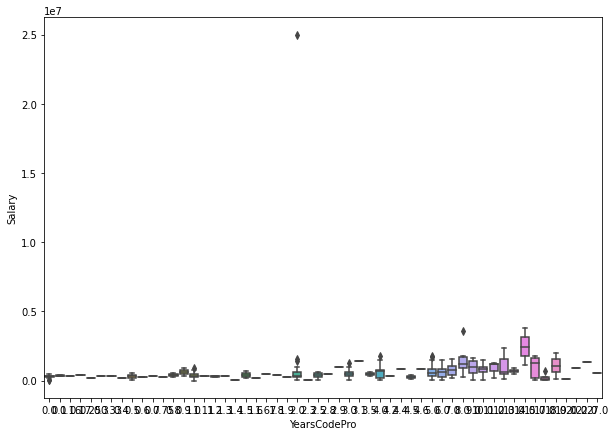

In [75]:
a4_dims = (10, 7)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax,x='YearsCodePro',y='Salary', data=df)

In [76]:
df = df[df['Salary'] <= 3e6]
df = df[df['Salary'] >= 1e5]
df = df[df['Salary'].notnull()]
df = df.dropna()
df['Salary'] /= 12
df['Salary'] /= 1e4

In [77]:
df = df.rename({'Salary':'_Salary'},axis=1)

### After clear out some noise
This chart now looks more promising

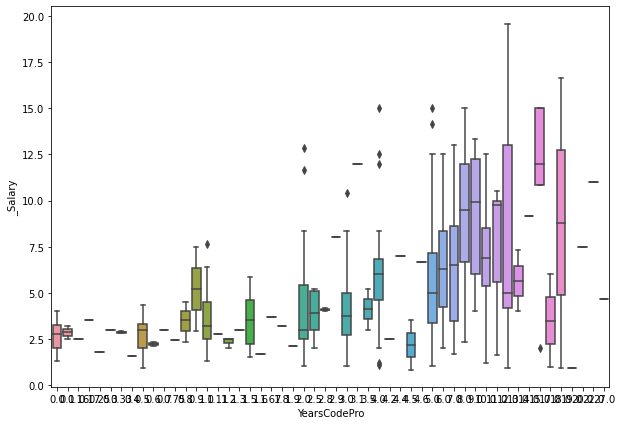

In [78]:
a4_dims = (10, 7)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax,x='YearsCodePro',y='_Salary', data=df)

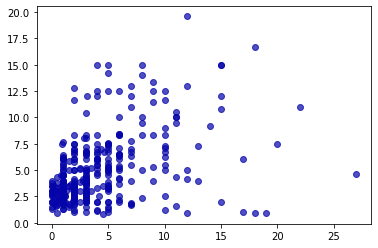

In [79]:
plt.scatter(df.YearsCodePro, df._Salary, color='#0504aa', alpha=0.7)
plt.show()

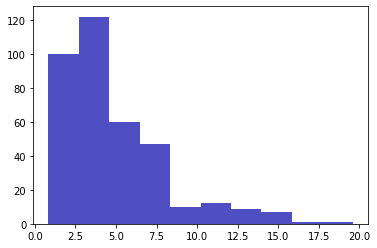

In [80]:
plt.hist(df['_Salary'], color='#0504aa', alpha=0.7)
plt.show()

## DevType

In [81]:
df['WorkPosition'] = df['WorkPosition'].astype('category')

In [82]:
df['DevType'].value_counts()

Full-stack developer                                                     35
Back-end developer, Front-end developer, Full-stack developer            19
Back-end developer                                                       18
Front-end developer                                                      16
Data scientist or machine learning specialist                            13
                                                                         ..
Front-end developer, Full-stack developer, #Web Developer                 1
Data or business analyst, Data engineer                                   1
Full-stack developer, DevOps specialist, #Cloud Engineer, #Consultant     1
Scientist, Academic researcher, Educator                                  1
#Security Engineer                                                        1
Name: DevType, Length: 189, dtype: int64

In [83]:
df['WorkPosition'].value_counts()

Web dev        193
Data            51
Mobile dev      34
Bussiness       14
Engineer        14
Admin           11
Desktop dev     10
Game dev         8
Manager          8
Service          6
Embled dev       5
Executive        4
Network          4
Security         4
Academic         2
Art              1
Name: WorkPosition, dtype: int64

## States

In [84]:
def get_in(x):
  jobs = []
  substring = ''
  iscollecting = False
  for s in x:
    if iscollecting:
      if s == ')':
        jobs.append(substring)
        substring = ''
        iscollecting = False
      else: substring += s

    if s == '(':
      iscollecting = True
  return jobs[0]

In [85]:
df['WorkPlace'].unique()

array(['กรุงเทพมหานคร (Bangkok)', 'ประจวบคีรีขันธ์ (Prachuap Kiri Kan)',
       'นนทบุรี (Nonthaburi)', 'นครราชสีมา (Nakhon Ratchasima)',
       'น่าน (Nan)', 'เชียงใหม่ (Chiang Mai)',
       'สมุทรปราการ (Samut Prakan)', 'ปทุมธานี (Pathum Thani)',
       'สงขลา (Songkla)', 'ขอนแก่น (Khon Kaen)', 'ราชบุรี (Ratchaburi)',
       'นครปฐม (Nakhon Pathom)', 'ชลบุรี (Chonburi)', 'ปัตตานี (Pattani)',
       'มหาสารคาม (Maha Sarakham)', 'จันทบุรี (Chanthaburi)',
       'ร้อยเอ็ด (Roi Et)', 'อุบลราชธานี (Ubon Ratchathani)',
       'พระนครศรีอยุธยา (Phra Nahhon Si Ayutthaya)', 'สตูล (Satun)',
       'ปราจีนบุรี (Prachin Buri)', 'อำนาจเจริญ (Amnat Charoen)',
       'ระนอง (Ranong)', 'ภูเก็ต (Phuket)',
       'สมุุทรสงคราม (Samut  Songkhram)'], dtype=object)

In [86]:
def clean_state(x):
  xstr = get_in(x)
  if xstr == 'Bangkok' or xstr == 'Nonthaburi' or xstr == 'Samut Prakan':
    return 1
  else:
    return 0

df['WorkPlace'] = df['WorkPlace'].apply(clean_state)

In [87]:
df['WorkPlace'].value_counts()

1    318
0     51
Name: WorkPlace, dtype: int64

## Final


In [88]:
df = df.reset_index()
df = df.drop(columns=['index'])

In [89]:
obj_feat = list(df.loc[:, df.dtypes == 'int64'].columns.values)
for feature in obj_feat:
  df[feature] = pd.Series(df[feature], dtype='category')

In [90]:
that_one_kid_who_ruin_the_model = df[df['DevType'] == 'Student'].index
print(that_one_kid_who_ruin_the_model)

Int64Index([74], dtype='int64')


In [91]:
df = df.drop(df[df['Employment'] == 'part-time'].index)

In [92]:
df = df.drop(columns=['WorkPosition','Employment'])

In [93]:
print(df.dtypes)
print('--------------')
print(f'record:{df.shape[0]} columns:{df.shape[1]}')
print('--------------')
df.head(10)

WorkPlace       category
EdLevel         category
YearsCodePro     float64
YearsCode        float64
DevType           object
OrgSize         category
_Salary          float64
dtype: object
--------------
record:369 columns:7
--------------


,WorkPlace,EdLevel,YearsCodePro,YearsCode,DevType,OrgSize,_Salary
0,1,2,4.0,15.0,"Data scientist or machine learning specialist, Scientist",4,12.500000
1,1,2,0.0,7.0,"Data scientist or machine learning specialist, Academic researcher, Student",4,2.000000
2,1,2,6.0,8.0,Data engineer,3,6.300000
3,1,1,5.0,5.0,"Front-end developer, QA or test developer, Designer",1,3.333333
4,1,1,2.0,4.0,Full-stack developer,4,2.200000
5,1,1,1.0,3.0,Data scientist or machine learning specialist,2,2.300000
6,1,2,1.0,3.0,Front-end developer,2,4.500000
7,1,1,0.5,0.5,"Data scientist or machine learning specialist, Data or business analyst",1,3.000000
8,1,1,1.0,5.0,"Back-end developer, Front-end developer, Data scientist or machine learning specialist, QA or test developer",2,6.400000
9,0,0,1.0,5.0,"Data scientist or machine learning specialist, Scientist, Academic researcher, Student",3,7.658333


In [94]:
# ax = df['WorkPosition'].value_counts()
# plt.pie(ax, labels=ax.index)
# plt.show()

In [95]:
# ax = df.groupby(by=['WorkPosition'], as_index=False).mean()[['WorkPosition','_Salary']].sort_values(by=['_Salary'],ascending=True)
# plt.barh(ax['WorkPosition'], ax['_Salary'])
# plt.xlabel('Salary(x10k BTH/Mnth)')
# plt.show()

## Train Test Split

In [96]:
df_test = pd.read_csv('test-set.csv')

train_data = df.drop(df_test['index'])
test_data = df.drop(train_data.index)

X_train = train_data.drop(columns=['_Salary'])
y_train = train_data['_Salary']

X_test = test_data.drop(columns=['_Salary'])
y_test = test_data['_Salary']

print(df_test.sort_values(by=['index']).iloc[0])
print('--------------------')
print(test_data.iloc[0])

# Drop Student
train_data = train_data.drop(that_one_kid_who_ruin_the_model)
X_train = X_train.drop(that_one_kid_who_ruin_the_model)
y_train = y_train.drop(that_one_kid_who_ruin_the_model)

print(len(y_train))
print(len(X_train))

Unnamed: 0                                                           12
index                                                                 5
WorkPlace                                                             1
EdLevel                                                               1
YearsCodePro                                                        1.0
YearsCode                                                           3.0
Employment                                                            1
WorkPosition                                                       Data
DevType                   Data scientist or machine learning specialist
LanguageHaveWorkedWith                       C, Python, SQL, Bash/Shell
Age                                                     18-24 years old
OrgSize                                                               2
Salary                                                              2.3
Baseline from DEPA                                              

### Check test data for a bit

These two cell should show the same array because they are the same test set 

In [97]:
test_data.index

Int64Index([  5,  13,  15,  18,  19,  23,  27,  31,  32,  40,  47,  48,  59,
             62,  65,  69,  70,  80,  89,  96,  97, 100, 101, 113, 138, 144,
            148, 149, 156, 162, 163, 164, 167, 171, 180, 182, 197, 201, 206,
            208, 222, 227, 232, 236, 245, 246, 249, 254, 259, 265, 269, 282,
            283, 286, 293, 296, 302, 304, 311, 317, 320, 321, 323, 324, 325,
            332, 333, 339, 345, 350, 353, 357],
           dtype='int64')

In [98]:
df_test.sort_values(by=['index'])['index'].values

array([  5,  13,  15,  18,  19,  23,  27,  31,  32,  40,  47,  48,  59,
        62,  65,  69,  70,  80,  89,  96,  97, 100, 101, 113, 138, 144,
       148, 149, 156, 162, 163, 164, 167, 171, 180, 182, 197, 201, 206,
       208, 222, 227, 232, 236, 245, 246, 249, 254, 259, 265, 269, 282,
       283, 286, 293, 296, 302, 304, 311, 317, 320, 321, 323, 324, 325,
       332, 333, 339, 345, 350, 353, 357])

# Training with AutoGluon

## Import AutoGluon

In [99]:
from autogluon.tabular import TabularDataset, TabularPredictor

## Data Preprocessing

Use Auto Gluon's feature engineer to create feature from DevType

### Fit Feature Generator

In [100]:
from autogluon.features.generators import AutoMLPipelineFeatureGenerator

auto_ml_pipeline_feature_generator = AutoMLPipelineFeatureGenerator()
auto_df =  auto_ml_pipeline_feature_generator.fit_transform(X=df)
auto_df.head()

Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12516.15 MB
	Train Data (Original)  Memory Usage: 0.06 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
		Fitting TextSpecialFeatureGenerator...
			Fitting BinnedFeatureGenerator...
			Fitting DropDuplicatesFeatureGenerator...
		Fitting TextNgramFeatureGenerator...
			Fitting CountVectorizer for text features: ['DevType']
			CountVectorizer fit with vocabulary size = 33
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Types of features

,WorkPlace,YearsCodePro,YearsCode,_Salary,EdLevel,DevType,OrgSize,DevType.char_count,DevType.word_count,DevType.capital_ratio,...,__nlp__.full stack developer,__nlp__.learning,__nlp__.machine,__nlp__.machine learning,__nlp__.or,__nlp__.scientist,__nlp__.specialist,__nlp__.stack,__nlp__.stack developer,__nlp__._total_
0,0,4.0,15.0,12.500000,2,NaN,4,6,4,0,...,0,1,1,1,1,2,1,0,0,7
1,0,0.0,7.0,2.000000,2,NaN,4,7,6,1,...,0,1,1,1,1,1,1,0,0,7
2,0,6.0,8.0,6.300000,2,17,3,0,0,7,...,0,0,0,0,0,0,0,0,0,2
3,0,5.0,5.0,3.333333,1,NaN,1,6,4,8,...,0,0,0,0,1,0,0,0,0,7
4,0,2.0,4.0,2.200000,1,28,4,1,0,2,...,1,0,0,0,0,0,0,1,1,6


### Transform dataset

In [101]:
train_data_auto = auto_ml_pipeline_feature_generator.transform(X=train_data)
test_data_auto = auto_ml_pipeline_feature_generator.transform(X=test_data)

X_train_auto = train_data_auto.drop(columns=['_Salary'])
y_train_auto = train_data_auto['_Salary']

X_test_auto = test_data_auto.drop(columns=['_Salary'])
y_test_auto = test_data_auto['_Salary']

In [102]:
auto_df.columns

Index(['WorkPlace', 'YearsCodePro', 'YearsCode', '_Salary', 'EdLevel',
       'DevType', 'OrgSize', 'DevType.char_count', 'DevType.word_count',
       'DevType.capital_ratio', 'DevType.lower_ratio', 'DevType.special_ratio',
       'DevType.symbol_count.#', 'DevType.symbol_ratio.#',
       'DevType.symbol_count. ', 'DevType.symbol_ratio. ',
       'DevType.symbol_count.-', 'DevType.symbol_ratio.-',
       '__nlp__.administrator', '__nlp__.analyst', '__nlp__.applications',
       '__nlp__.back', '__nlp__.back end', '__nlp__.back end developer',
       '__nlp__.data', '__nlp__.database', '__nlp__.database administrator',
       '__nlp__.developer', '__nlp__.developer front',
       '__nlp__.developer front end', '__nlp__.developer full',
       '__nlp__.developer full stack', '__nlp__.end', '__nlp__.end developer',
       '__nlp__.end developer front', '__nlp__.end developer full',
       '__nlp__.engineer', '__nlp__.front', '__nlp__.front end',
       '__nlp__.front end developer', '__nl

## Train model

In [122]:
from google.colab import drive
drive.mount('/content/drive')
repos = '/content/drive/MyDrive/Colab Stuff/it-salary/'

Mounted at /content/drive


In [123]:
save_path = repos + 'ag-models'
predictor = TabularPredictor(label='_Salary', path=save_path).fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/MyDrive/Colab Stuff/it-salary/ag-models/"
AutoGluon Version:  0.4.2
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    296
Train Data Columns: 6
Label Column: _Salary
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (19.6, 0.8333333333333334, 4.78995, 3.17293)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11267.11 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set fe

## Results

In [124]:
# Make sure that model can be loaded from path
predictor = TabularPredictor.load(save_path)

y_pred = predictor.predict(X_test)
print("Predictions:  \n", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: -2.2924210115289316
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -2.2924210115289316,
    "mean_squared_error": -5.2551940940993305,
    "mean_absolute_error": -1.7836234306847605,
    "r2": 0.5359438195295215,
    "pearsonr": 0.7603399775802729,
    "median_absolute_error": -1.3318117618560792
}


Predictions:  
 5      2.886487
13     4.403265
15     2.972446
18     3.183681
19     4.585208
         ...   
339    7.372317
345    2.509177
350    3.805174
353    8.330303
357    5.297292
Name: _Salary, Length: 72, dtype: float32


In [105]:
info = predictor.info()

In [106]:
model_weight = info['model_info']['WeightedEnsemble_L2']['children_info']['S1F1']['model_weights']

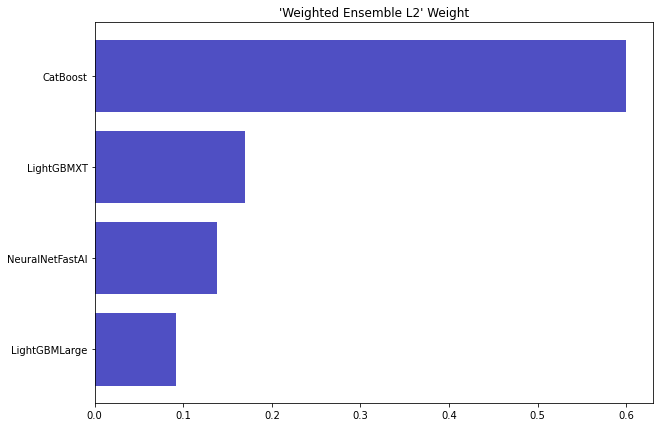

In [107]:
# get from predictor.info()

name = np.array(['LightGBMLarge','NeuralNetFastAI','LightGBMXT','CatBoost'])
value = np.array([model_weight[name[0]],
                  model_weight[name[1]],
                  model_weight[name[2]],
                  model_weight[name[3]]])

plt.figure(figsize=(10,7))
plt.title('\'Weighted Ensemble L2\' Weight')
plt.barh(name, value, color='#0504aa', alpha=0.7)
plt.show()

### Model Leaderboard

In [108]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-2.292421,-2.396743,0.251667,0.095378,10.006335,0.008408,0.000845,0.966965,2,True,12
1,ExtraTreesMSE,-2.325231,-2.602158,0.179164,0.108626,1.268237,0.179164,0.108626,1.268237,1,True,7
2,CatBoost,-2.336999,-2.408999,0.042525,0.011825,3.057040,0.042525,0.011825,3.057040,1,True,6
3,LightGBMLarge,-2.391461,-2.541930,0.068602,0.040154,0.886144,0.068602,0.040154,0.886144,1,True,11
4,LightGBMXT,-2.406846,-2.497957,0.077777,0.009253,0.318063,0.077777,0.009253,0.318063,1,True,3
5,NeuralNetFastAI,-2.416432,-2.628423,0.054355,0.033302,4.778122,0.054355,0.033302,4.778122,1,True,8
6,LightGBM,-2.502165,-2.514691,0.023069,0.007672,0.307565,0.023069,0.007672,0.307565,1,True,4
7,RandomForestMSE,-2.548155,-2.840210,0.133057,0.107934,0.958692,0.133057,0.107934,0.958692,1,True,5
8,KNeighborsUnif,-2.772323,-2.962835,0.123068,0.108127,0.033804,0.123068,0.108127,0.033804,1,True,1
9,KNeighborsDist,-2.790269,-3.012490,0.152906,0.104832,0.016907,0.152906,0.104832,0.016907,1,True,2


### Feature Importance


In [109]:
feature_im = predictor.feature_importance(data=train_data)
feature_im

Computing feature importance via permutation shuffling for 6 features using 296 rows with 5 shuffle sets...
	27.78s	= Expected runtime (5.56s per shuffle set)
	5.81s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
DevType,1.115524,0.056467,7.851856e-07,5,1.231791,0.999257
YearsCodePro,0.936241,0.025677,6.782380e-08,5,0.989110,0.883371
YearsCode,0.444613,0.035024,4.582720e-06,5,0.516728,0.372499
WorkPlace,0.141131,0.037976,5.726887e-04,5,0.219324,0.062938
EdLevel,0.123594,0.045564,1.865621e-03,5,0.217411,0.029776
OrgSize,0.110311,0.016174,5.391049e-05,5,0.143614,0.077007


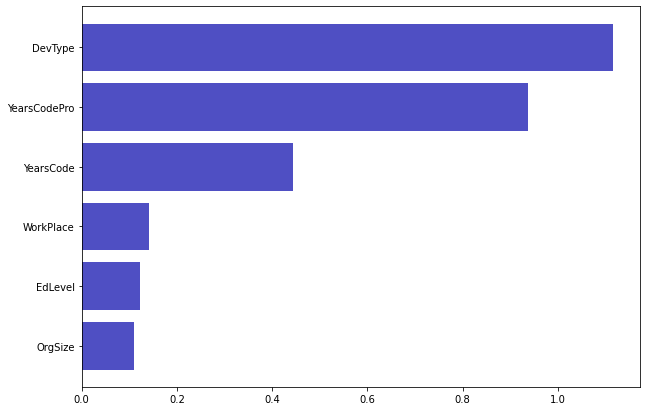

In [110]:
feature_im = feature_im.sort_values(by=['importance'], ascending=True)
plt.figure(figsize=(10,7))
plt.barh(feature_im.index, feature_im['importance'], color='#0504aa', alpha=0.7)
plt.show()

## Evaluate
Evaluate again to make sure auto gluon doesn't make mistakes.

### Metrics

In [111]:
import math
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_absolute_percentage_error, mean_squared_error

pred = predictor.predict(X_train)
mse = mean_squared_error(y_train, pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_train, pred)
mape = mean_absolute_percentage_error(y_train, pred)
r2 = r2_score(y_train, pred)

print('Train MSE : {:.2f}'.format(mse))
print('Train RMSE : {:.2f}'.format(rmse))
print('Train MAE : {:.2f}'.format(mae))
print('Train MAPE : {:.2f}'.format(mape))
print('Train R2 : {:.2f}'.format(r2))

print('-----------------')

pred = predictor.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
r2 = r2_score(y_test, pred)

print('Test MSE : {:.2f}'.format(mse))
print('Test RMSE : {:.2f}'.format(rmse))
print('Test MAE : {:.2f}'.format(mae))
print('Test MAPE : {:.2f}'.format(mape))
print('Test R2 : {:.2f}'.format(r2))

Train MSE : 3.01
Train RMSE : 1.73
Train MAE : 1.19
Train MAPE : 0.37
Train R2 : 0.70
-----------------
Test MSE : 5.26
Test RMSE : 2.29
Test MAE : 1.78
Test MAPE : 0.47
Test R2 : 0.54


### Error Rate

In [112]:
err = []
for i in range(len(pred)):
  err.append(abs(pred.values[i] - y_test.values[i]))



print('MAX ERR : {:.2f}'.format(max(err)*1e4))
print('MIN ERR : {:.2f}'.format(min(err)*1e4))
print('MEAN ERR : {:.2f}'.format(sum(err)*1e4/len(err)))

MAX ERR : 63478.69
MIN ERR : 756.31
MEAN ERR : 17836.23


## Okay, compared with baseline

In [113]:
# Load test set
df_test = pd.read_csv('test-set.csv')
df_test = df_test.drop(columns=['Unnamed: 0'])
df_test = df_test.rename({'Salary':'_Salary'}, axis=1)

df_test.index = df_test['index']
df_test = df_test.drop(columns=['index'])

df_test = df_test.dropna()

In [114]:
print(df_test.sort_values(by=['index']).index)
df_test.sort_values(by=['index']).drop(columns=['LanguageHaveWorkedWith','Age','index.1']).head()

Int64Index([  5,  13,  15,  18,  19,  23,  27,  31,  32,  40,  47,  48,  59,
             62,  65,  69,  70,  80,  89,  96,  97, 100, 101, 113, 138, 144,
            148, 149, 156, 162, 163, 164, 167, 171, 180, 182, 197, 201, 206,
            208, 222, 227, 232, 236, 245, 246, 249, 254, 259, 265, 269, 282,
            283, 286, 293, 296, 302, 304, 311, 317, 320, 321, 323, 324, 325,
            332, 333, 339, 345, 350, 353, 357],
           dtype='int64', name='index')


,WorkPlace,EdLevel,YearsCodePro,YearsCode,Employment,WorkPosition,DevType,OrgSize,_Salary,Baseline from DEPA
index,,,,,,,,,,
5,1,1,1.0,3.0,1,Data,Data scientist or machine learning specialist,2,2.3,51100
13,1,1,4.2,4.2,1,Admin,"Back-end developer, Database administrator",2,2.5,42700
15,1,1,2.9,2.9,1,Bussiness,Marketing or sales professional,4,8.0,29600
18,1,1,0.0,2.0,1,Web dev,"Back-end developer, Student",2,3.5,41000
19,1,1,2.0,6.0,1,Admin,"Data scientist or machine learning specialist, Database administrator, Engineering manager, System administrator, Student",2,2.2,32500


In [115]:
print(test_data.index)
test_data.head()

Int64Index([  5,  13,  15,  18,  19,  23,  27,  31,  32,  40,  47,  48,  59,
             62,  65,  69,  70,  80,  89,  96,  97, 100, 101, 113, 138, 144,
            148, 149, 156, 162, 163, 164, 167, 171, 180, 182, 197, 201, 206,
            208, 222, 227, 232, 236, 245, 246, 249, 254, 259, 265, 269, 282,
            283, 286, 293, 296, 302, 304, 311, 317, 320, 321, 323, 324, 325,
            332, 333, 339, 345, 350, 353, 357],
           dtype='int64')


,WorkPlace,EdLevel,YearsCodePro,YearsCode,DevType,OrgSize,_Salary
5,1,1,1.0,3.0,Data scientist or machine learning specialist,2,2.3
13,1,1,4.2,4.2,"Back-end developer, Database administrator",2,2.5
15,1,1,2.9,2.9,Marketing or sales professional,4,8.0
18,1,1,0.0,2.0,"Back-end developer, Student",2,3.5
19,1,1,2.0,6.0,"Data scientist or machine learning specialist, Database administrator, Engineering manager, System administrator, Student",2,2.2


In [116]:
testcase = df_test.drop(columns=['Baseline from DEPA'])
testcase.sort_index().head()

,WorkPlace,EdLevel,YearsCodePro,YearsCode,Employment,WorkPosition,DevType,LanguageHaveWorkedWith,Age,OrgSize,_Salary,index.1
index,,,,,,,,,,,,
5,1,1,1.0,3.0,1,Data,Data scientist or machine learning specialist,"C, Python, SQL, Bash/Shell",18-24 years old,2,2.3,5
13,1,1,4.2,4.2,1,Admin,"Back-end developer, Database administrator","C#, HTML/CSS, SQL",25-34 years old,2,2.5,13
15,1,1,2.9,2.9,1,Bussiness,Marketing or sales professional,Python,25-34 years old,4,8.0,15
18,1,1,0.0,2.0,1,Web dev,"Back-end developer, Student","C, Java, Kotlin, Go, HTML/CSS, JavaScript, Node.js, PowerShell, Python, SQL, Bash/Shell, Matlab, C++",18-24 years old,2,3.5,18
19,1,1,2.0,6.0,1,Admin,"Data scientist or machine learning specialist, Database administrator, Engineering manager, System administrator, Student","Assembly, C, Java, HTML/CSS, JavaScript, Python, SQL, Matlab, R",25-34 years old,2,2.2,19


### My Model

In [117]:
X_test.head()

,WorkPlace,EdLevel,YearsCodePro,YearsCode,DevType,OrgSize
5,1,1,1.0,3.0,Data scientist or machine learning specialist,2
13,1,1,4.2,4.2,"Back-end developer, Database administrator",2
15,1,1,2.9,2.9,Marketing or sales professional,4
18,1,1,0.0,2.0,"Back-end developer, Student",2
19,1,1,2.0,6.0,"Data scientist or machine learning specialist, Database administrator, Engineering manager, System administrator, Student",2


In [118]:
pred = predictor.predict(testcase.drop(columns=['_Salary',
                                                'Age',
                                                #'DevType',
                                                'LanguageHaveWorkedWith',
                                                'WorkPosition'
                                                ]))

df_pred = pd.DataFrame(columns=['pred','real'])
df_pred['pred'] = pred
df_pred['real'] = testcase['_Salary'].values
df_pred['err'] = abs(pred - df_pred['real'])*1e4
df_pred.head()

,pred,real,err
index,,,
197,7.818798,14.166667,63478.686048
339,7.372317,9.500000,21276.826859
304,4.050282,3.300000,7502.820015
48,4.908927,7.000000,20910.725594
302,4.854716,3.700000,11547.158241


### Baseline Model

In [119]:
baseline = df_test['Baseline from DEPA']

df_base = pd.DataFrame(columns=['pred','real'])
df_base['pred'] = baseline / 1e4
df_base['real'] = testcase['_Salary'].values
df_base['err'] = abs(df_base['pred'] - df_base['real'])*1e4
df_base.head()

,pred,real,err
index,,,
197,2.275,14.166667,118916.6667
339,4.800,9.500000,47000.0000
304,2.400,3.300000,9000.0000
48,4.500,7.000000,25000.0000
302,4.200,3.700000,5000.0000


### Mean Rule-Based Model

In [120]:
# Prof.Charin rule-based model
meanie = train_data['_Salary'].mean()
meanie_arr = np.full(len(testcase), meanie)

df_meanie = pd.DataFrame(columns=['pred','real'])
df_meanie['pred'] = meanie_arr
df_meanie['real'] = testcase['_Salary'].values
df_meanie['err'] = abs(df_meanie['pred'] - df_meanie['real'])*1e4
df_meanie.index = df_pred.index
df_meanie.head()

,pred,real,err
index,,,
197,4.789949,14.166667,93767.175991
339,4.789949,9.500000,47100.509291
304,4.789949,3.300000,14899.490709
48,4.789949,7.000000,22100.509291
302,4.789949,3.700000,10899.490709


### Final Result

In [121]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import math

names = np.array(['Our Model','Baseline','Mean Rule-based'])
datas = np.array([df_pred['pred'], df_base['pred'], df_meanie['pred']])

for i in range(len(names)):
  mse = mean_squared_error(testcase['_Salary'], datas[i])
  rmse = math.sqrt(mse)
  mae = mean_absolute_error(testcase['_Salary'], datas[i])
  mape = mean_absolute_percentage_error(testcase['_Salary'], datas[i])
  r2 = r2_score(testcase['_Salary'], datas[i])

  err = []
  for j in range(len(datas[i])):
    err.append(abs(datas[i][j] - testcase['_Salary'].values[j]))
  
  print('\n/============= {} =============/'.format(names[i]))
  print('MAX ERR : {:.2f}'.format(max(err)*1e4))
  print('MIN ERR : {:.2f}'.format(min(err)*1e4))
  print('MEAN ERR : {:.2f}'.format(sum(err)*1e4/len(err)))
  print('--------------------')
  print('MSE : {:.2f}'.format(mse*1e4))
  print('RMSE : {:.2f}'.format(rmse*1e4))
  print('MAE : {:.2f}'.format(mae*1e4))
  print('MAPE : {:.2f}'.format(mape))
  print('R2 : {:.2f}'.format(r2))


/============= Our Model =============/
MAX ERR : 63478.69
MIN ERR : 756.31
MEAN ERR : 17798.86
--------------------
MSE : 52472.00
RMSE : 22906.77
MAE : 17798.86
MAPE : 0.47
R2 : 0.54

/============= Baseline =============/
MAX ERR : 118916.67
MIN ERR : 200.00
MEAN ERR : 22764.00
--------------------
MSE : 111116.17
RMSE : 33334.09
MAE : 22764.00
MAPE : 0.47
R2 : 0.02

/============= Mean Rule-based =============/
MAX ERR : 102100.51
MIN ERR : 1566.16
MEAN ERR : 25785.74
--------------------
MSE : 113659.66
RMSE : 33713.45
MAE : 25785.74
MAPE : 0.71
R2 : -0.00
